In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("dataset/Text.csv")
df=df.drop('Unnamed: 0',axis=1)
df

,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1
...,...,...
19878,A day without sunshine is like night.,0
19879,"Boren's Laws: (1) When in charge, ponder. (2) ...",0
19880,The flow chart is a most thoroughly oversold p...,0
19881,"Ships are safe in harbor, but they were never ...",0


In [3]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

## Text Preprocessing
### Convert to lowercase

In [4]:
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Removing numerical values

In [5]:
df["post_text"] = df["post_text"].str.replace("\d","")

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


### Removing punctations

In [6]:
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


### STOPWORDS

In [7]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatization

In [8]:
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Word Tokenization

In [9]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

### Frequency Analysis

In [10]:
df["frequency"] = df["post_text"].apply(lambda x: len(str(x).split(" ")))

In [11]:
df.groupby("frequency").max()
df[df["post_text"].str.contains("sos unique")]
longest_comment=df.iloc[3038,0]
print(longest_comment)

rt sostumblrx michael almost years old httpstcokvzbtmbnbp


In [12]:
TextBlob(longest_comment).tags

[('rt', 'NN'),
 ('sostumblrx', 'NN'),
 ('michael', 'VBZ'),
 ('almost', 'RB'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 ('httpstcokvzbtmbnbp', 'NN')]

In [13]:
df

,post_text,label,tokens,frequency
0,years since diagnosed anxiety depression today...,1,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,1,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,1,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,1,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,1,"[hard, say, whether, packing, lists, making, l...",14
...,...,...,...,...
19878,day without sunshine like night,0,"[day, without, sunshine, like, night]",5
19879,borens laws charge ponder trouble delegate dou...,0,"[borens, laws, charge, ponder, trouble, delega...",8
19880,flow chart thoroughly oversold piece program d...,0,"[flow, chart, thoroughly, oversold, piece, pro...",13
19881,ships safe harbor never meant stay,0,"[ships, safe, harbor, never, meant, stay]",6


## Data Visualization

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

### We need convert all reivews to single text

In [15]:
text = " ".join(i for i in df.post_text)

In [16]:
text

'years since diagnosed anxiety depression today im taking moment reflect far ive come since sunday need break im planning spend little time possible awake tired need sleep brain ideas rt sewhq retro bears make perfect gifts great beginners get stitching octobers sew sale yay httptco hard say whether packing lists making life easier reinforcing much still needs movinghouse anxiety making packing lists new hobby movinghouse point keeping stuff nostalgic reasons cross line plain old hoarding movinghouse currently findingboxesofrandomshit packing phase think im closet hoarder cant bothered cook take away way lazy rt itventsnews itv releases promo video final series downton abbey httptcomcivezr httptcocfbkrrvjis also much stuff way way much movinghouse never want put one together lotharderthanitlooks httptcoujltcklb moving stuff bloomin knackering theres still loads back house moving stuff peaceful urgh anxiety ffs come breathe much stuff way way much massive purge way hideous traffic must 

### Creating the wordcloud

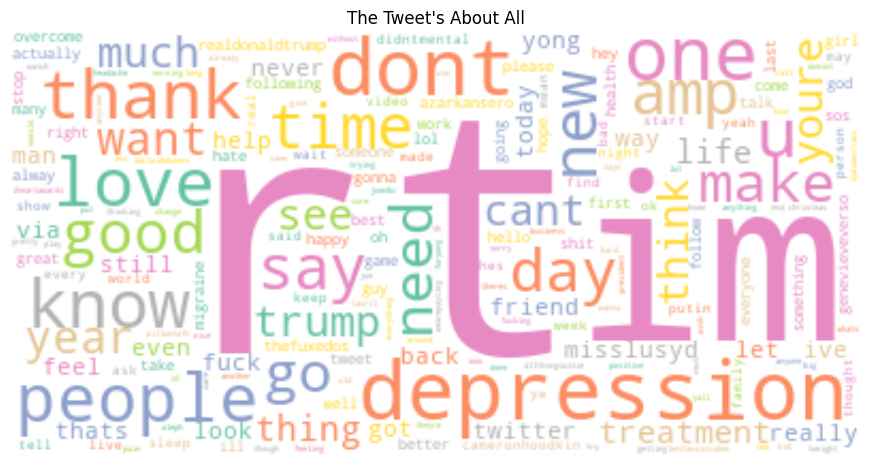

In [17]:
wordcloud = WordCloud(
    background_color="white",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About All")
plt.show()

### Most Common Words

In [18]:
from nltk import *
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [19]:
text = " ".join(i for i in df.post_text)

In [20]:
#import emoji

#text = emoji.demojize(text)

lemmatizer=WordNetLemmatizer()
text1 = nltk.tokenize.word_tokenize(str(text))
english_vocab = set([i.lower() for i in nltk.corpus.words.words()])
wordlist1 = [w for w in text1 if w in english_vocab]

title_details = [lemmatizer.lemmatize(i.lower()) for i in wordlist1 if (i.lower() in english_vocab) and (len(i)>7)]
fd_words = nltk.FreqDist(title_details)
fd_words.most_common(20)

[('depression', 875),
 ('following', 226),
 ('overcome', 219),
 ('actually', 199),
 ('something', 183),
 ('everyone', 145),
 ('positive', 134),
 ('everything', 125),
 ('thinking', 118),
 ('anything', 107),
 ('christmas', 106),
 ('business', 103),
 ('president', 93),
 ('migraine', 91),
 ('birthday', 89),
 ('watching', 86),
 ('literally', 85),
 ('remember', 84),
 ('addiction', 81),
 ('tomorrow', 80)]

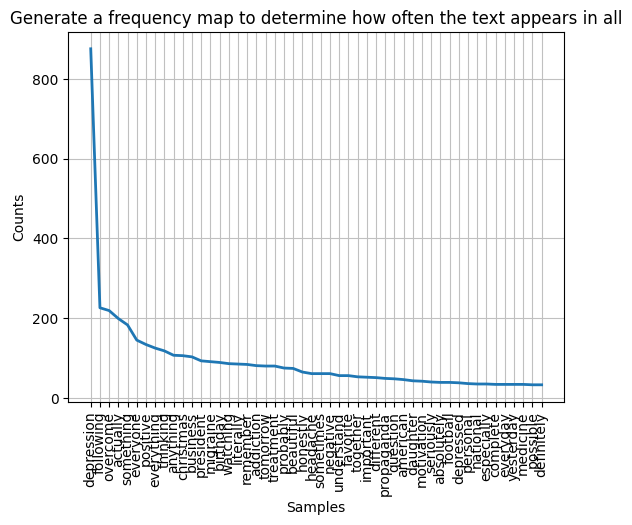

<AxesSubplot:title={'center':'Generate a frequency map to determine how often the text appears in all'}, xlabel='Samples', ylabel='Counts'>

In [21]:
### generate a frequency plot to determine proportion of the text taken up by the words
plt.title("Generate a frequency map to determine how often the text appears in all")
fd_words.plot(50, cumulative=False)

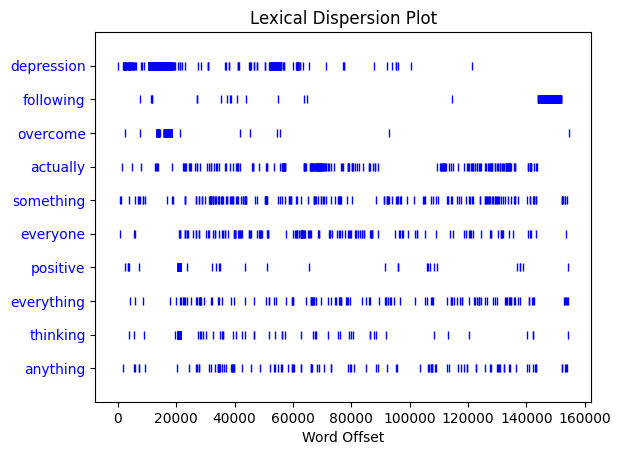

In [22]:
tokens = nltk.word_tokenize(str(text))   # tokenize it
mytext = nltk.Text(tokens)  
#%matplotlib inline
mytext.dispersion_plot(["depression", "following", "overcome","actually","something","everyone","positive","everything","thinking","anything"])

### Posting for depressed VS non-depressed people

In [23]:
depressed=df[df['label']==1]
depressed

,post_text,label,tokens,frequency
0,years since diagnosed anxiety depression today...,1,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,1,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,1,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,1,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,1,"[hard, say, whether, packing, lists, making, l...",14
...,...,...,...,...
9939,rt cslewisu agreed forgiveness beautiful idea ...,1,"[rt, cslewisu, agreed, forgiveness, beautiful,...",8
9940,cant believe year blastyblast wlmhk picstitch ...,1,"[cant, believe, year, blastyblast, wlmhk, pics...",7
9941,one year ago journey began never knew challeng...,1,"[one, year, ago, journey, began, never, knew, ...",12
9942,found new hammocking friends park today gotta ...,1,"[found, new, hammocking, friends, park, today,...",12


In [24]:
depressed_text = " ".join(i for i in depressed.post_text)
depressed_text

'years since diagnosed anxiety depression today im taking moment reflect far ive come since sunday need break im planning spend little time possible awake tired need sleep brain ideas rt sewhq retro bears make perfect gifts great beginners get stitching octobers sew sale yay httptco hard say whether packing lists making life easier reinforcing much still needs movinghouse anxiety making packing lists new hobby movinghouse point keeping stuff nostalgic reasons cross line plain old hoarding movinghouse currently findingboxesofrandomshit packing phase think im closet hoarder cant bothered cook take away way lazy rt itventsnews itv releases promo video final series downton abbey httptcomcivezr httptcocfbkrrvjis also much stuff way way much movinghouse never want put one together lotharderthanitlooks httptcoujltcklb moving stuff bloomin knackering theres still loads back house moving stuff peaceful urgh anxiety ffs come breathe much stuff way way much massive purge way hideous traffic must 

In [25]:
non_depressed=df[df['label']==0]
non_depressed

,post_text,label,tokens,frequency
9944,enemys invisible dont know fight,0,"[enemys, invisible, dont, know, fight]",5
9945,im gonna burn house ugly brack,0,"[im, gon, na, burn, house, ugly, brack]",6
9946,hot_cocoa_____ counterattack,0,"[hot_cocoa, counterattack]",2
9947,noob_aspe goldentachi,0,"[noob_aspe, goldentachi]",2
9948,lol spl drow,0,"[lol, spl, drow]",3
...,...,...,...,...
19878,day without sunshine like night,0,"[day, without, sunshine, like, night]",5
19879,borens laws charge ponder trouble delegate dou...,0,"[borens, laws, charge, ponder, trouble, delega...",8
19880,flow chart thoroughly oversold piece program d...,0,"[flow, chart, thoroughly, oversold, piece, pro...",13
19881,ships safe harbor never meant stay,0,"[ships, safe, harbor, never, meant, stay]",6


In [26]:
non_depressed_text = " ".join(i for i in non_depressed.post_text)
non_depressed_text

'enemys invisible dont know fight im gonna burn house ugly brack hot_cocoa_____ counterattack noob_aspe goldentachi lol spl drow hure lime rt leagueoflegends pbe preview warring kingdoms garen splash art httpstconlpxclfal rt leagueoflegends pbe preview heartseeker quinn splash art httpstconrgdpqkto cant see arrow lux new meta vs httpstcouesqeguda lvoe much im gonna cry httpstcohxepjihh rt blackchalkmzine katherine mcnamara touch destiny httpstcovnlbbsuhm httpstcourekvlimu kat thsi adclaidekanes scream hurt even tho upbeat music made everything seem fun adclaidekanes followed closely studying scene shows shes using system ok dont reaos n dont go anymore stiles malias best scene still basement scene thank u goodnight dont reason beliamysciarkes dont knwo editing term space part im dead amazing httpstcoxwyrmaa adclaidekanes also ive literally never wanted physically fight someone much want fight almost happened tonight popping say got hurl cup water step sister get trouble thats awesome d

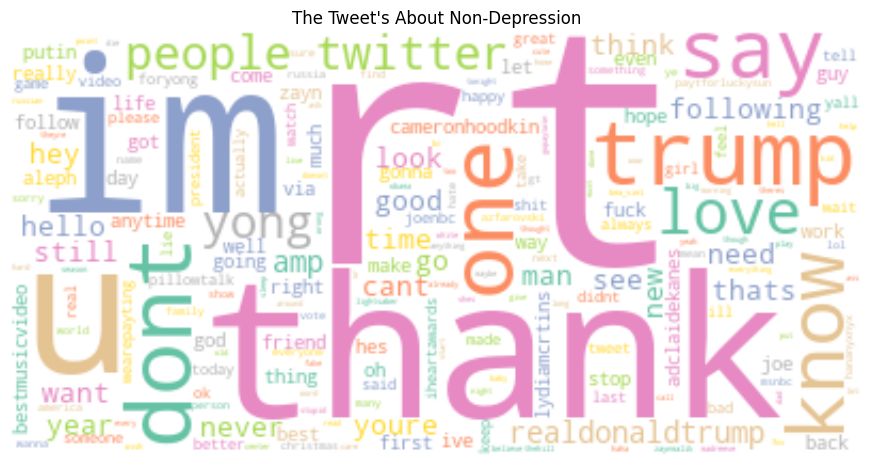

In [27]:
wordcloud = WordCloud(
    background_color="white",
    colormap="Set2",
    collocations=False).generate(non_depressed_text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Non-Depression")
plt.show()

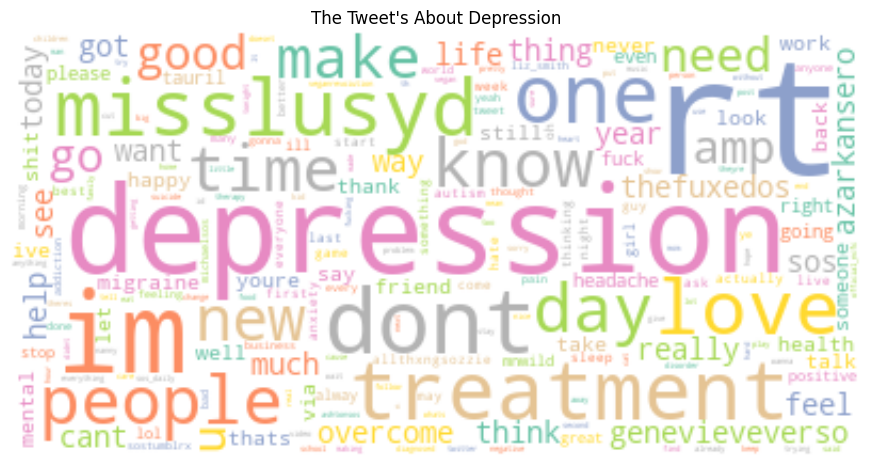

In [28]:
wordcloud = WordCloud(
    background_color="white",
    colormap="Set2",
    collocations=False).generate(depressed_text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression")
plt.show()

In [29]:
lemmatizer=WordNetLemmatizer()
text1 = nltk.tokenize.word_tokenize(str(non_depressed_text))
english_vocab = set([i.lower() for i in nltk.corpus.words.words()])
wordlist1 = [w for w in text1 if w in english_vocab]

title_details = [lemmatizer.lemmatize(i.lower()) for i in wordlist1 if (i.lower() in english_vocab) and (len(i)>7)]
fd_words = nltk.FreqDist(title_details)
fd_words.most_common(20)

[('following', 211),
 ('actually', 93),
 ('president', 89),
 ('something', 79),
 ('christmas', 77),
 ('everything', 66),
 ('everyone', 54),
 ('anything', 52),
 ('propaganda', 49),
 ('birthday', 47),
 ('literally', 46),
 ('remember', 39),
 ('tomorrow', 38),
 ('watching', 38),
 ('honestly', 34),
 ('probably', 33),
 ('beautiful', 29),
 ('sometimes', 28),
 ('favorite', 27),
 ('furiously', 27)]

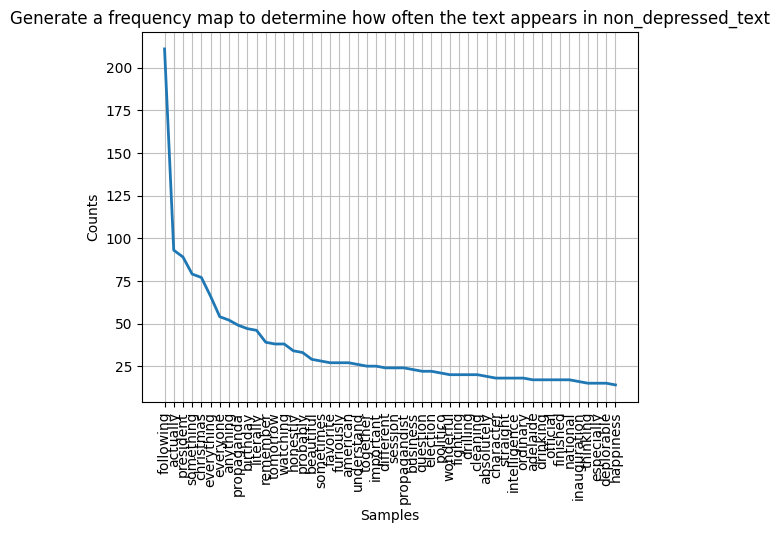

<AxesSubplot:title={'center':'Generate a frequency map to determine how often the text appears in non_depressed_text'}, xlabel='Samples', ylabel='Counts'>

In [30]:
plt.title("Generate a frequency map to determine how often the text appears in non_depressed_text")
fd_words.plot(50, cumulative=False)

In [31]:
lemmatizer=WordNetLemmatizer()
text1 = nltk.tokenize.word_tokenize(str(depressed_text))
english_vocab = set([i.lower() for i in nltk.corpus.words.words()])
wordlist1 = [w for w in text1 if w in english_vocab]

title_details = [lemmatizer.lemmatize(i.lower()) for i in wordlist1 if (i.lower() in english_vocab) and (len(i)>7)]
fd_words = nltk.FreqDist(title_details)
fd_words.most_common(20)

[('depression', 867),
 ('overcome', 217),
 ('positive', 121),
 ('actually', 106),
 ('something', 104),
 ('thinking', 103),
 ('everyone', 91),
 ('migraine', 91),
 ('business', 80),
 ('addiction', 80),
 ('treatment', 78),
 ('headache', 61),
 ('negative', 60),
 ('everything', 59),
 ('anything', 55),
 ('watching', 48),
 ('remember', 45),
 ('beautiful', 45),
 ('birthday', 42),
 ('tomorrow', 42)]

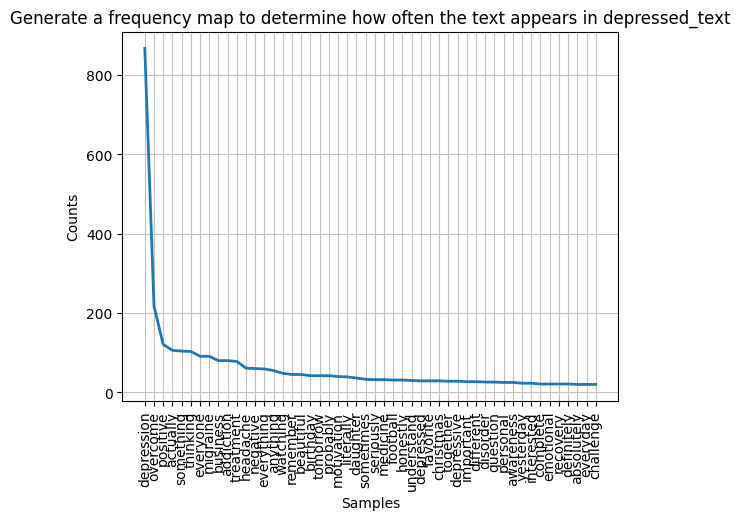

<AxesSubplot:title={'center':'Generate a frequency map to determine how often the text appears in depressed_text'}, xlabel='Samples', ylabel='Counts'>

In [32]:
plt.title("Generate a frequency map to determine how often the text appears in depressed_text")
fd_words.plot(50, cumulative=False)